## This notebook explores the Top2Vec topic model of the MythFic-Corpus

This notebook explores the usefulness of Top2Vec topic modeling for exploring the MythFic corpus of 5.000+ works of English-language fanfiction about Greek Myth from the Archive of Our Own.

I created a topic model which took each individual story as a doc as imput. However, I removed the 200 shortest and 200 longest stories from my dataset, so most stories under 100 words and stories over 25000 words were disregarded. The model has a manageable number of topics, which you can explore in this notebook. 

Content warning: topics are an approximate representation of what in the corpus. That includes sex, violence and other subject matter some readers may want to avoid.


In [1]:
pip install top2vec

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing the necessary packages

import umap.plot
import numpy as np
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
import umap.umap_ as umap
import matplotlib.pyplot as plt
from PIL import Image
import top2vec

/Users/julia.neugarten/opt/anaconda3/envs/Top2Vec/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


Run the cell below to load the model.

In [3]:
from top2vec import Top2Vec
model = Top2Vec.load("cleanmodel")

Now check how many topics are in the model by running the cell below.

In [4]:
model.get_num_topics()

44

## Exploring the topics

As discussed in the presentation, topics consist of words. 
You can get the topic model to show you the words in any topic.
Let's start with the top 20.

In [5]:
model.get_topics(20)

(array([['persephone', 'demeter', 'spring', 'flowers', 'pomegranate',
         'underworld', 'seeds', 'bloom', 'kore', 'hades', 'withered',
         'fields', 'grow', 'fruit', 'maiden', 'pomegranates', 'earth',
         'springtime', 'harvest', 'realm', 'plants', 'flower', 'winter',
         'wheat', 'blooms', 'barren', 'wither', 'soil', 'blossoms',
         'blossom', 'bloomed', 'blooming', 'husband', 'petals',
         'asphodels', 'asphodel', 'domain', 'wilting', 'fruits', 'summer',
         'mortals', 'wilt', 'mother', 'harvests', 'ripe', 'her',
         'gardens', 'leaves', 'garden', 'crops'],
        ['mewled', 'hips', 'sweetness', 'thighs', 'bucked', 'arousal',
         'quivered', 'clit', 'moaned', 'climax', 'asscheeks', 'pussy',
         'climaxed', 'orgasm', 'thrusted', 'pleasure', 'cock', 'wetness',
         'purred', 'slid', 'moan', 'breasts', 'stroked', 'thrust',
         'labia', 'lips', 'swollen', 'tongue', 'sliding', 'keened',
         'bucking', 'slick', 'pulsed', 'min

What do you notice? Do the topics have internal coherence?

Although as we've discussed it's tricky to interpret topics,
I would roughly identify or label them like this:


## Topic Sizes

We might want to know something about topic sizes: how many documents relate to each topic? It is also possible to find the specific stories that relate most strongly to a topic, but for ethical reasons I have not included that possibility here. I don't have permission from each individual fanfic-author to share their work outside of AO3.


In [6]:
topic_sizes, topic_nums = model.get_topic_sizes()
for topic_size, topic_num in zip(topic_sizes[:45], topic_nums[:45]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")

Topic Num 0 has 535 documents.
Topic Num 1 has 360 documents.
Topic Num 2 has 301 documents.
Topic Num 3 has 279 documents.
Topic Num 4 has 223 documents.
Topic Num 5 has 215 documents.
Topic Num 6 has 203 documents.
Topic Num 7 has 174 documents.
Topic Num 8 has 166 documents.
Topic Num 9 has 159 documents.
Topic Num 10 has 158 documents.
Topic Num 11 has 158 documents.
Topic Num 12 has 125 documents.
Topic Num 13 has 124 documents.
Topic Num 14 has 120 documents.
Topic Num 15 has 119 documents.
Topic Num 16 has 113 documents.
Topic Num 17 has 113 documents.
Topic Num 18 has 112 documents.
Topic Num 19 has 110 documents.
Topic Num 20 has 99 documents.
Topic Num 21 has 92 documents.
Topic Num 22 has 88 documents.
Topic Num 23 has 76 documents.
Topic Num 24 has 75 documents.
Topic Num 25 has 70 documents.
Topic Num 26 has 62 documents.
Topic Num 27 has 61 documents.
Topic Num 28 has 53 documents.
Topic Num 29 has 51 documents.
Topic Num 30 has 51 documents.
Topic Num 31 has 50 documents

## Wordclouds

Now we're getting to the fun stuff! It's possible to visualize the words in a given topic. Run the cell below. 

It gives you a wordcloud for topic number 8, which I labeled 'Patroclus/Achilles modern AU (coffeeshop, university, high school)'

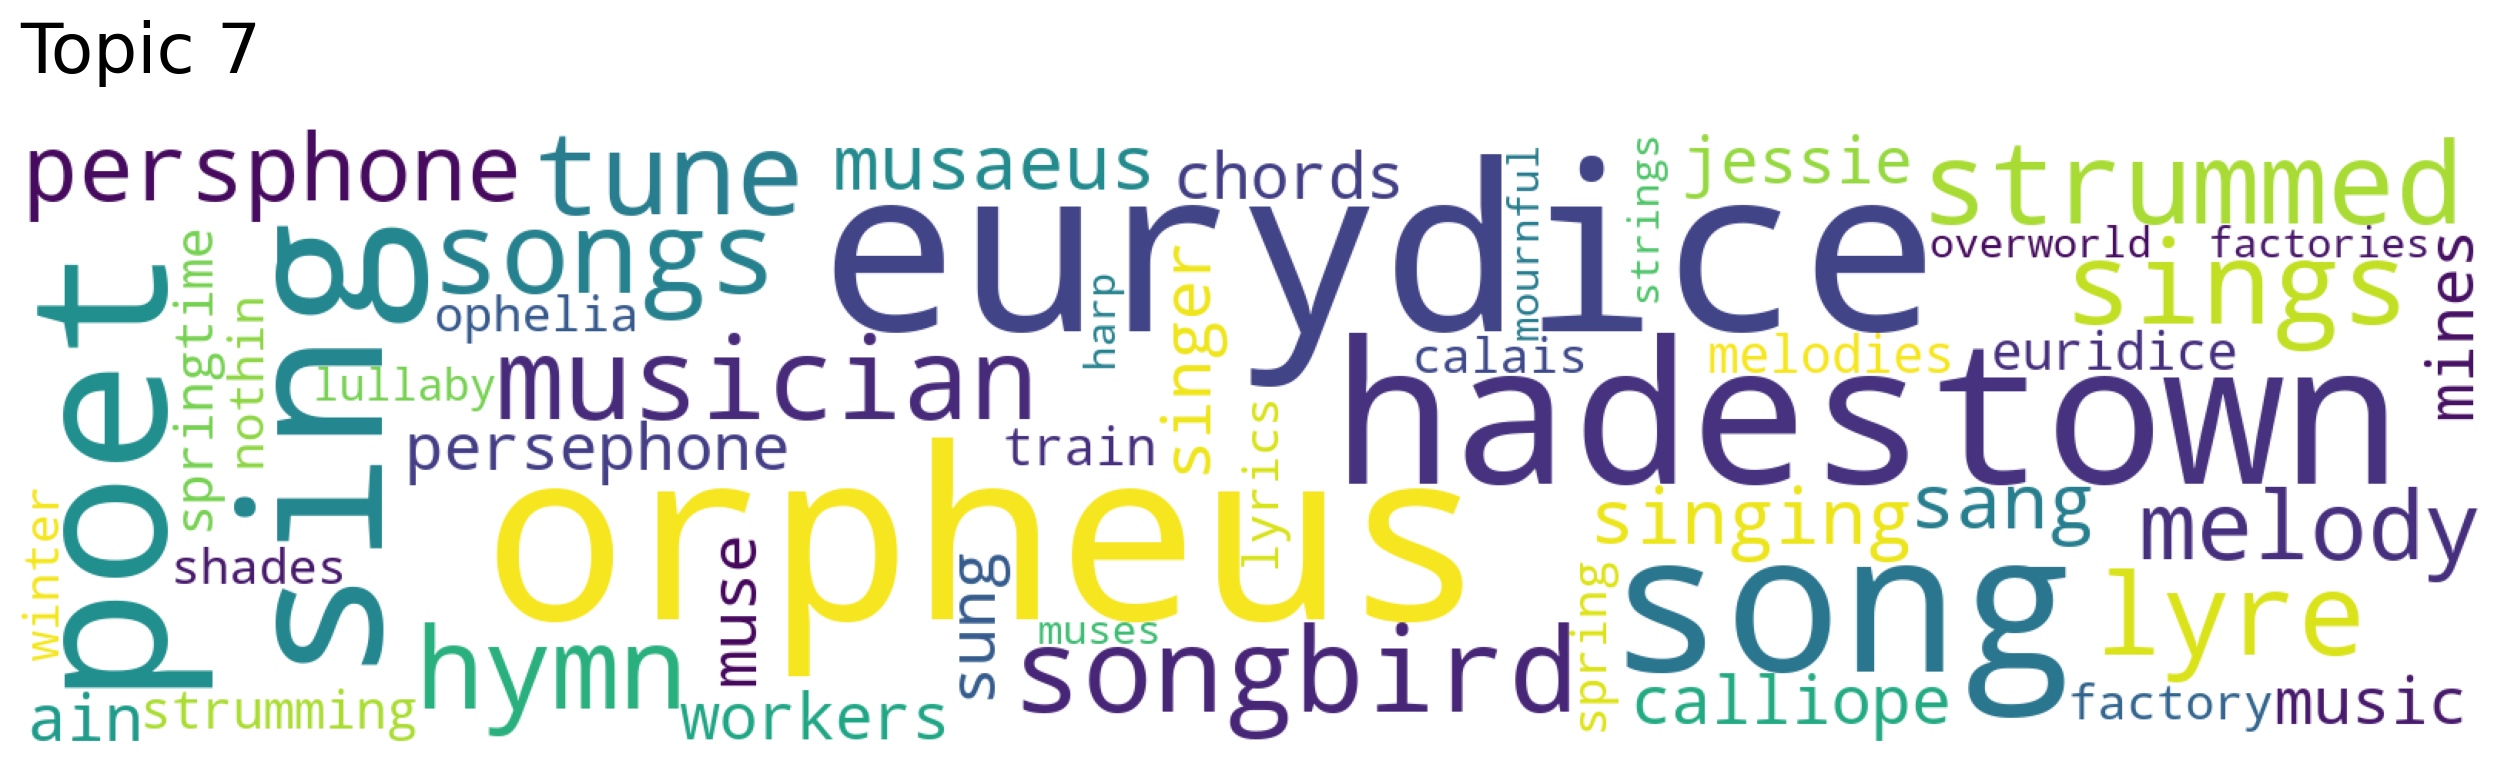

In [8]:
model.generate_topic_wordcloud(7, background_color="white")

Alternatively, you can search topics relating to a specific keyword, then visualize these topics as word clouds as well.

For example, if you run this code you get visualizations of topics related to 'woman', we can see that topics 9, 31, 0, 36 and 1 represent different aspects of 'woman' present in the dataset. Please note that I explicitly asked for five topics, so 'woman' may be present in more topics or it may be not very present in some of these five.

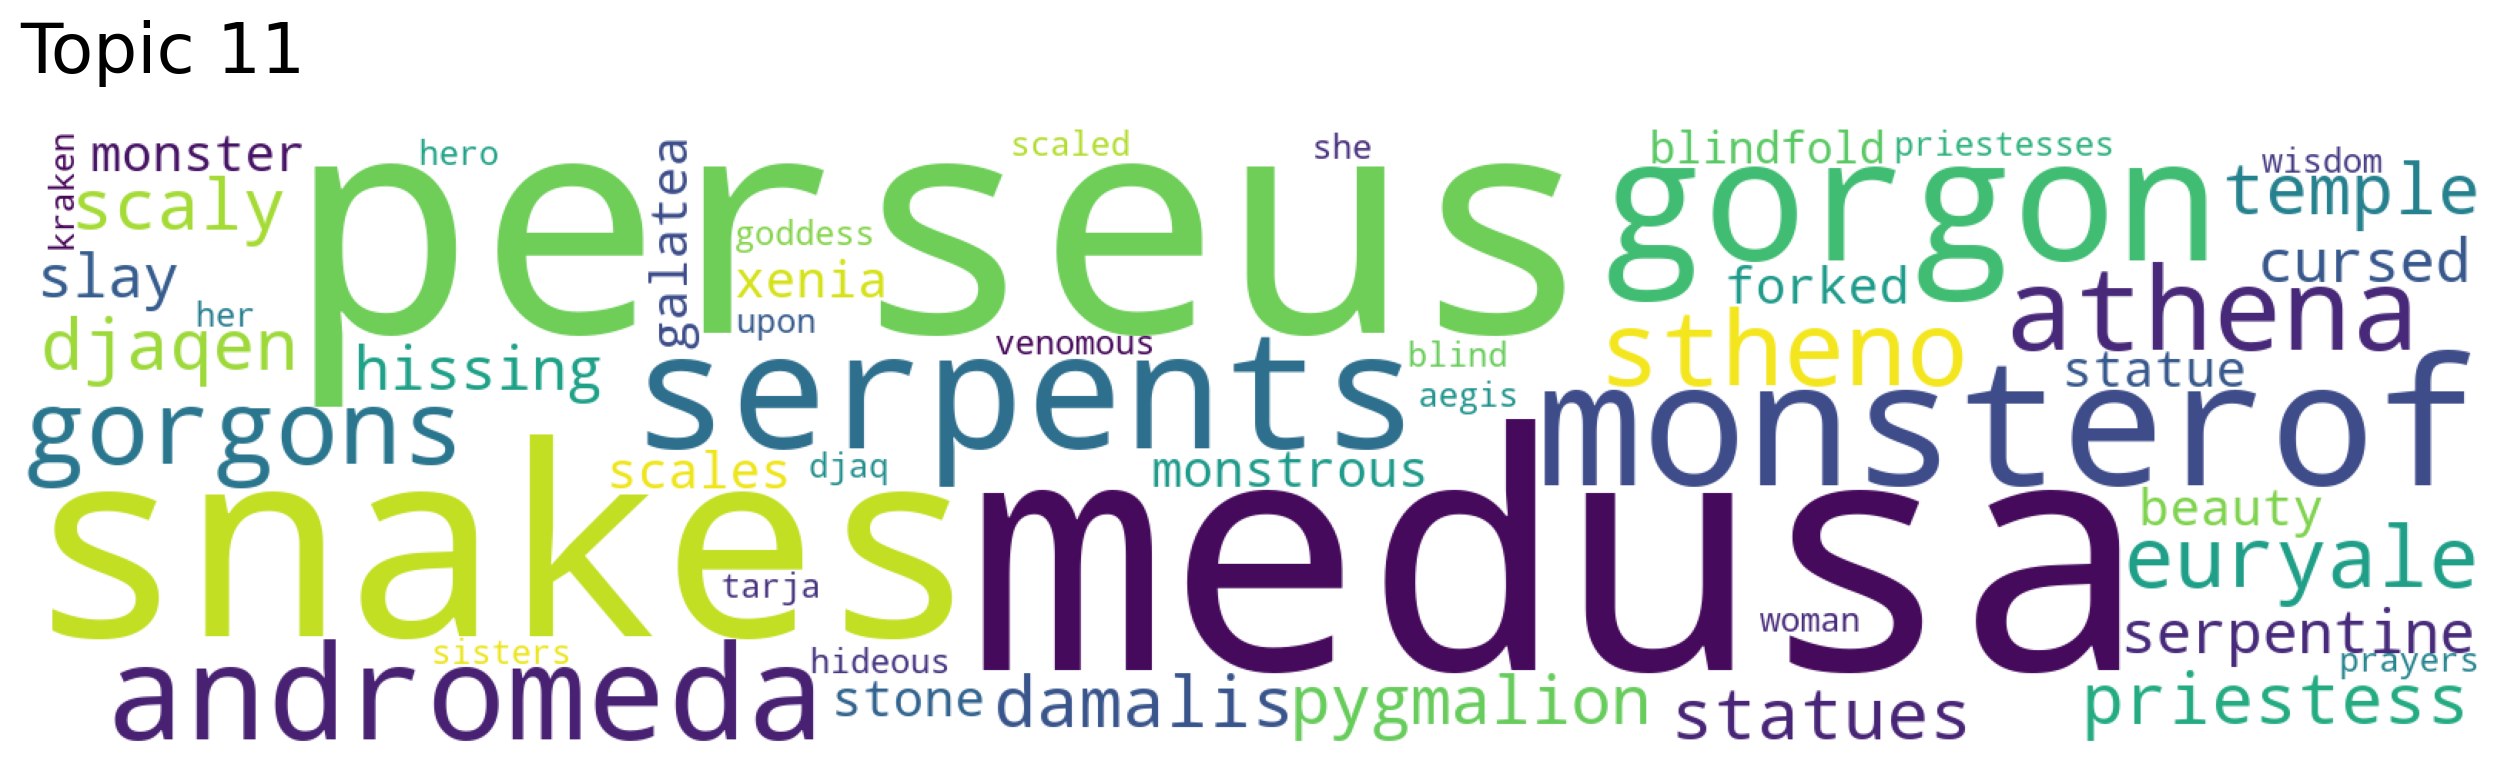

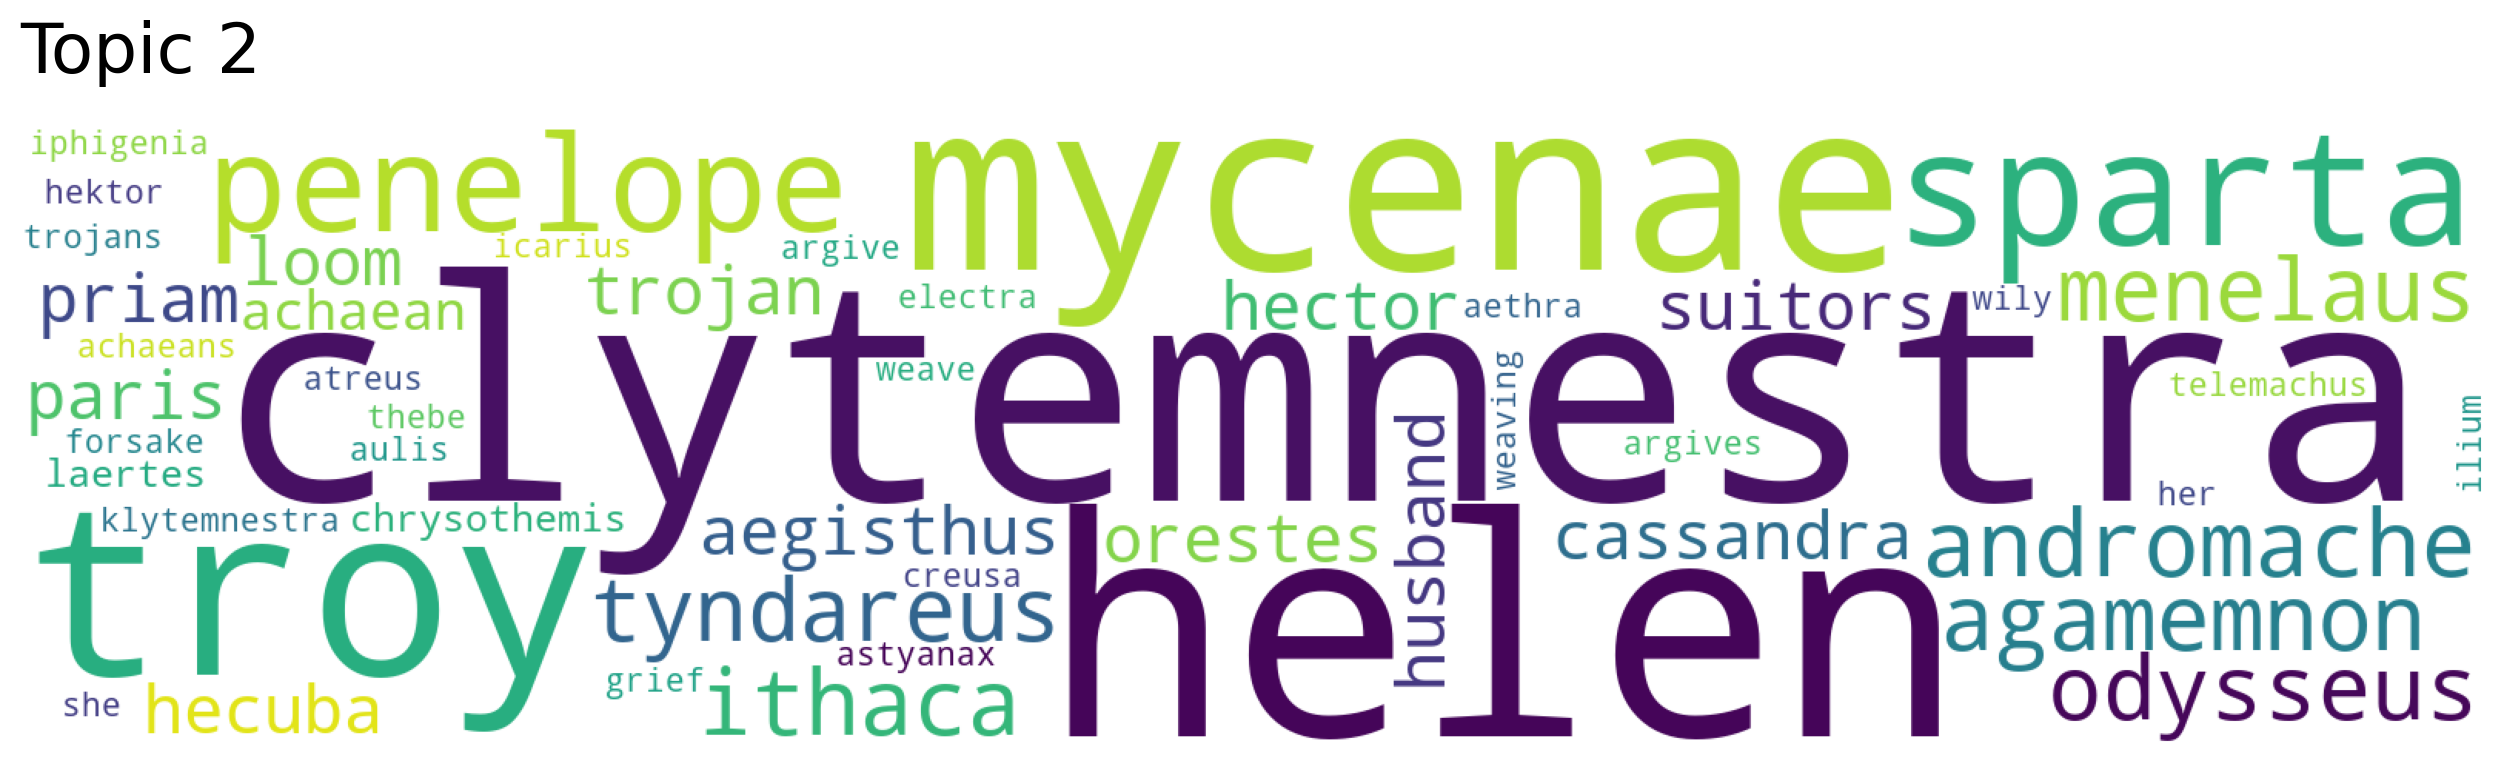

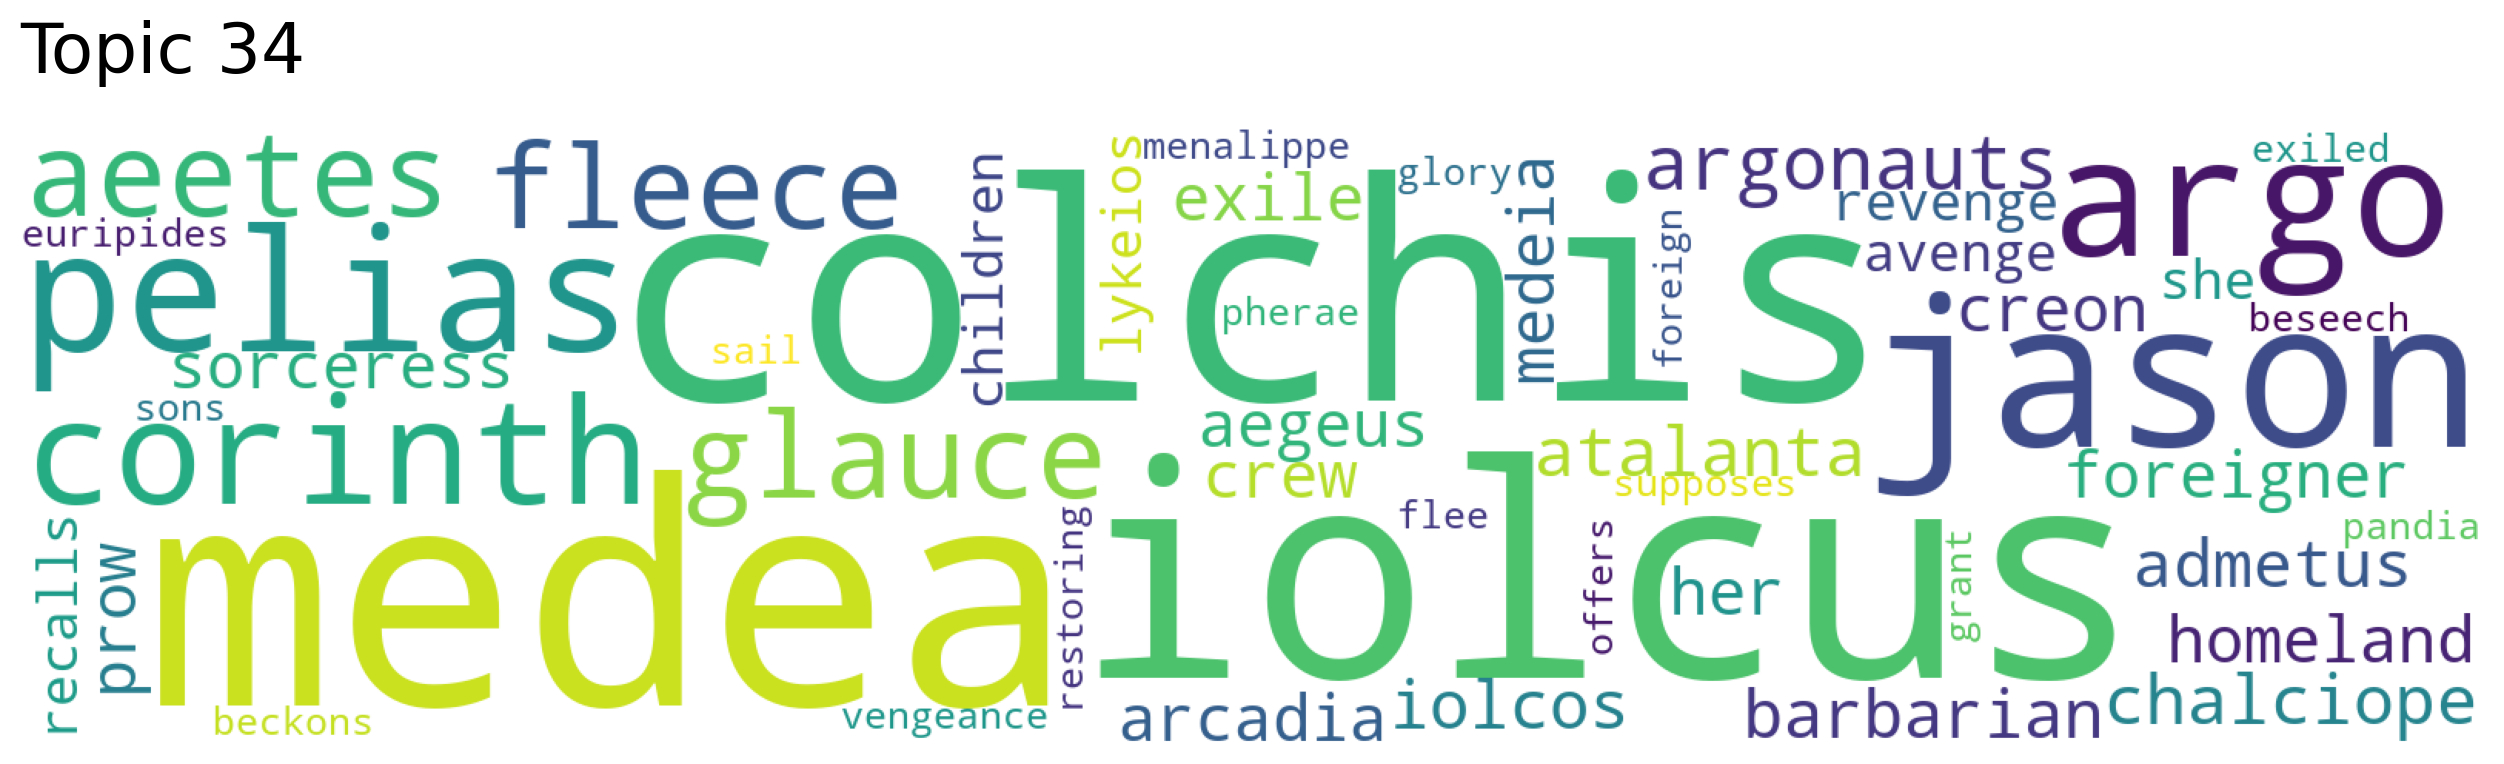

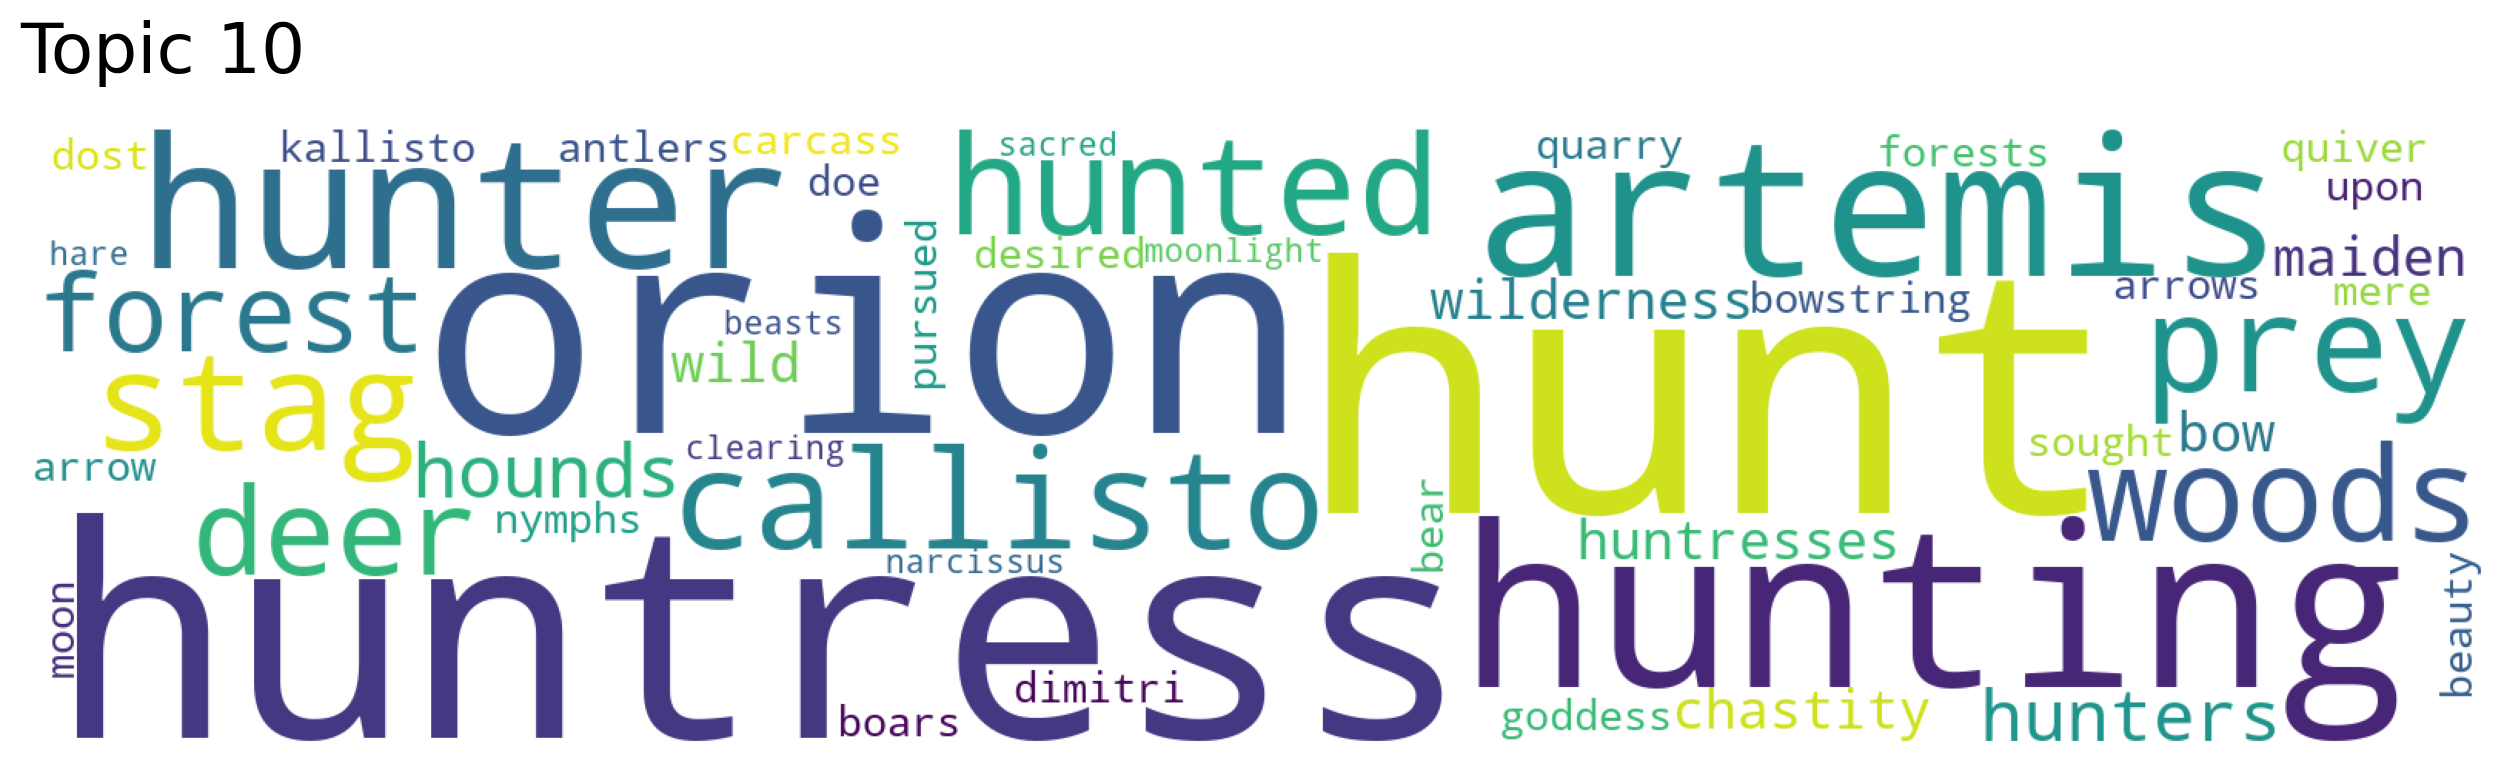

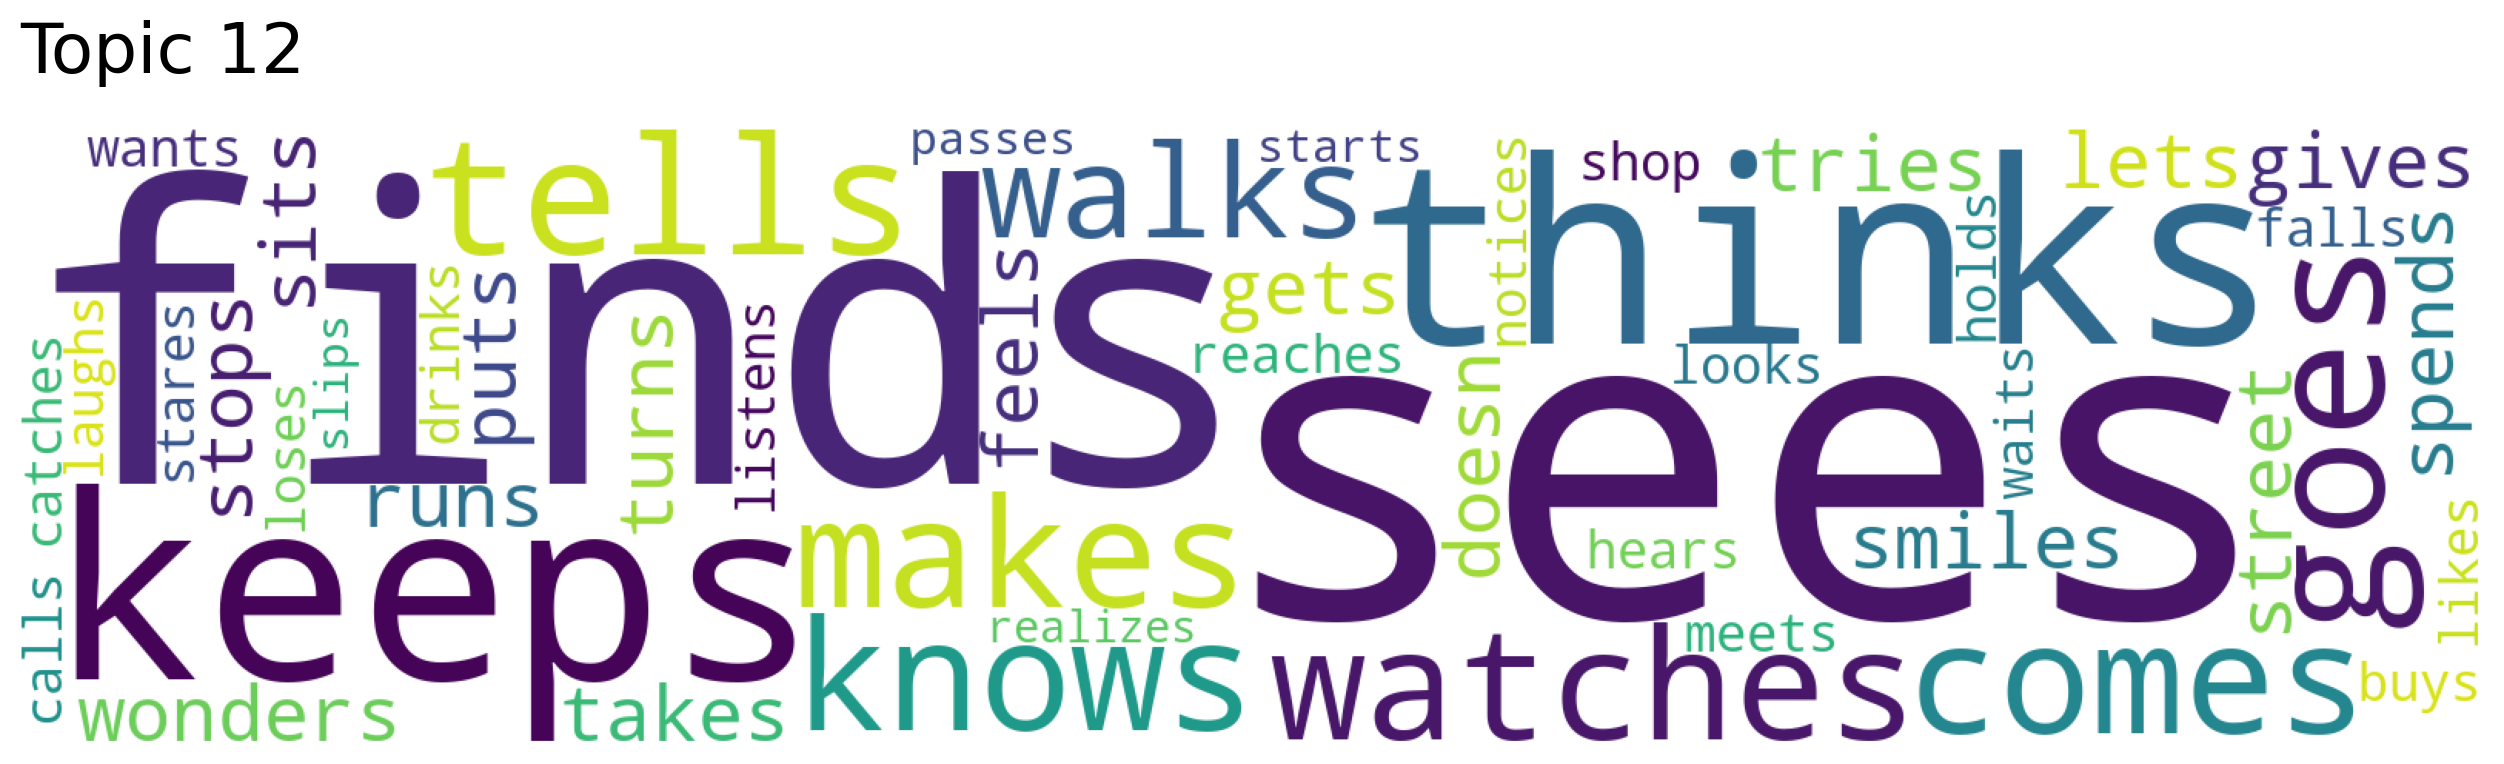

In [6]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["woman"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color="white")